                                   Machine Learning Assignment 2

Predict automobile price using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('AutoData (1).csv')

In [3]:
data

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
'''there are no null values'''
data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [8]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

<AxesSubplot:ylabel='price'>

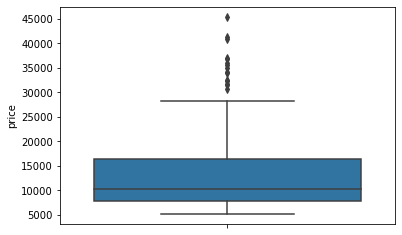

In [9]:
sns.boxplot(y=data['price'])

In [10]:
data['fueltype'].value_counts(normalize=True)

gas       0.902439
diesel    0.097561
Name: fueltype, dtype: float64

In [11]:
data['carbody'].value_counts(normalize=True)

sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: carbody, dtype: float64

In [12]:
data['enginelocation'].value_counts(normalize=True)

front    0.985366
rear     0.014634
Name: enginelocation, dtype: float64

In [13]:
data['aspiration'].value_counts(normalize=True)

std      0.819512
turbo    0.180488
Name: aspiration, dtype: float64

In [14]:
data['fuelsystem'].value_counts(normalize=True)

mpfi    0.458537
2bbl    0.321951
idi     0.097561
1bbl    0.053659
spdi    0.043902
4bbl    0.014634
spfi    0.004878
mfi     0.004878
Name: fuelsystem, dtype: float64

In [15]:
data.groupby(["fueltype"])['price'].mean()

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

In [16]:
data.groupby(["carbody"])['price'].mean()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

In [17]:
data.groupby(["fuelsystem"])['price'].mean()

fuelsystem
1bbl     7555.545455
2bbl     7478.151515
4bbl    12145.000000
idi     15838.150000
mfi     12964.000000
mpfi    17754.602840
spdi    10990.444444
spfi    11048.000000
Name: price, dtype: float64

In [18]:
data.groupby(["doornumber"])['price'].mean()

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64

In [19]:
data.groupby(["aspiration"])['price'].mean()

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

In [20]:
data.groupby(["cylindernumber"])['price'].mean()

cylindernumber
eight     37400.100000
five      21630.469727
four      10285.754717
six       23671.833333
three      5151.000000
twelve    36000.000000
two       13020.000000
Name: price, dtype: float64

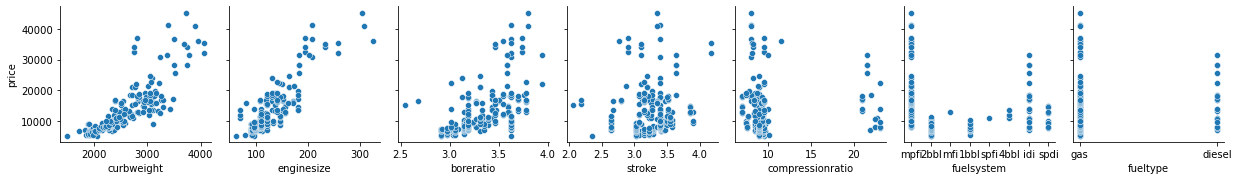

In [21]:
sns.pairplot(data,x_vars=['curbweight','enginesize','boreratio','stroke','compressionratio','fuelsystem','fueltype'],y_vars="price")

In [22]:
data1=data.copy()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
data1['symboling']=le.fit_transform(data['symboling'])

data1['make']=le.fit_transform(data['make'])

data1['fueltype']=le.fit_transform(data['fueltype'])

data1['aspiration']=le.fit_transform(data['aspiration'])
data1['doornumber']=le.fit_transform(data['doornumber'])
data1['carbody']=le.fit_transform(data['carbody'])
data1['drivewheel']=le.fit_transform(data['drivewheel'])
data1['enginelocation']=le.fit_transform(data['enginelocation'])
data1['enginetype']=le.fit_transform(data['enginetype'])
data1['cylindernumber']=le.fit_transform(data['cylindernumber'])
data1['fuelsystem']=le.fit_transform(data['fuelsystem'])

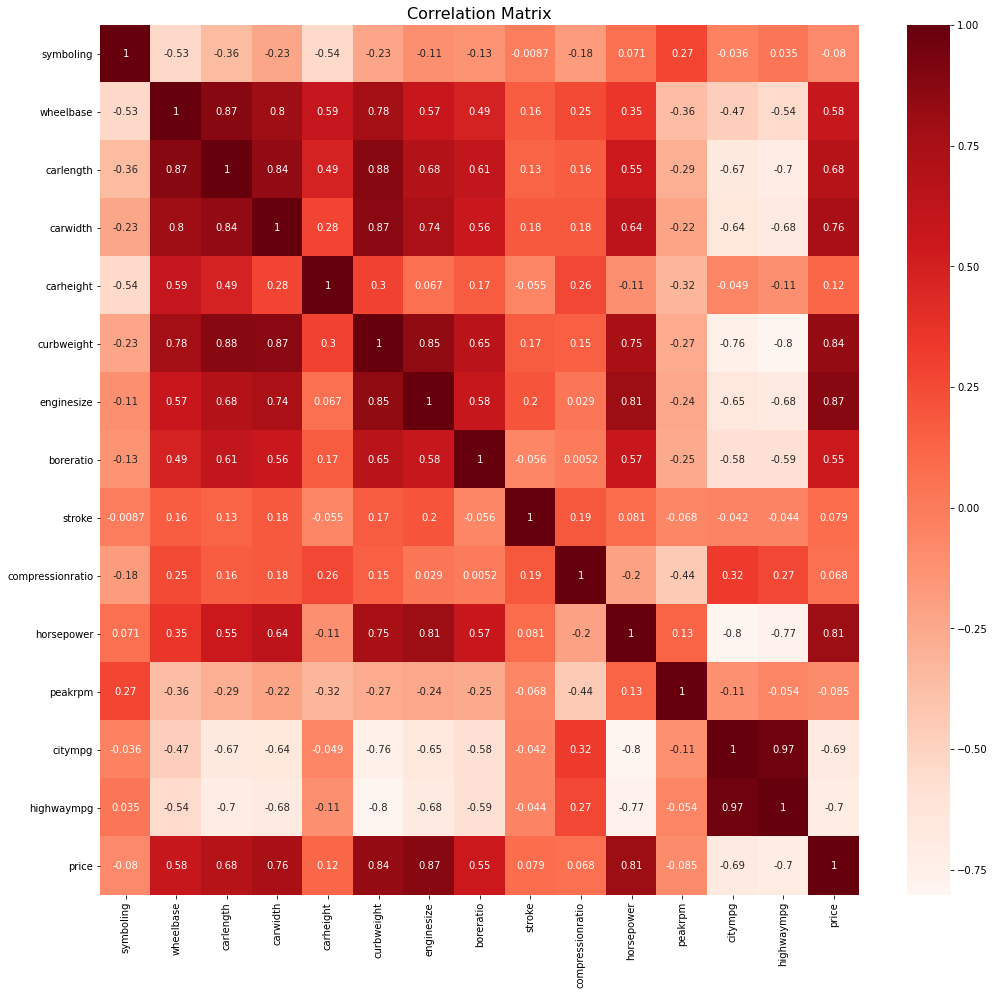

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(17,16))
data['symboling'] = LabelEncoder().fit_transform(data['symboling'])

# Separate both dataframes into 
numeric_data = data.select_dtypes(exclude="object")


corr_numeric = numeric_data.corr()


sns.heatmap(corr_numeric , annot=True, cmap="Reds")
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [25]:
 numeric_data.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [26]:
symboling=data.copy()

In [27]:
'''it seem that weelbase,car width,curbweight,car height,horepower has high corelation with  the price'''

'it seem that weelbase,car width,curbweight,car height,horepower has high corelation with  the price'

In [28]:
x = data[['enginesize']]
y = data['price']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)

In [30]:
len(x_train), len(y_train), len(x_test), len(y_test)

(143, 143, 62, 62)

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
lr.intercept_,lr.coef_

(-7646.435077807868, array([165.76866245]))

In [33]:
from sklearn.metrics import r2_score
pred = lr.predict(x_test)
r2_score(y_test,pred)

0.7534902447506853

In [34]:
X = data1.drop("price", axis=1)
X.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,5,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,5,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,4,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [35]:
y = data1[['price']]
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [36]:
data1_train,data1_test=train_test_split(data1, train_size = 0.7, random_state = 42)

In [37]:
y_train = data1_train['price']
X_train = data1_train
y_test = data1_test['price']
X_test = data1_test

In [38]:
from sklearn.linear_model import LinearRegression
lr2= LinearRegression()

In [39]:
lr2.fit(X_train,y_train)

LinearRegression()

In [40]:
X_train.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [41]:
pred=lr2.predict(X_train)
r2_score(y_train,pred)

1.0

In [42]:
from sklearn.feature_selection import RFE
lr3 = LinearRegression()
rfe_selector = RFE(lr3, 10)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [43]:
rfe_selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [44]:
rfe_selector.support_

array([ True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True])

In [45]:
rfe_selector.ranking_

array([ 1, 10,  1,  1,  1,  1,  1,  1,  7,  9,  2,  6, 15,  8,  4, 11,  5,
        1,  3,  1, 12, 16, 13, 14,  1])

In [46]:
cols_keep = X_train.columns[rfe_selector.support_]


In [47]:
cols_keep

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'boreratio', 'compressionratio',
       'price'],
      dtype='object')

In [48]:
lr3 = LinearRegression()

In [49]:
lr3.fit(X_train[cols_keep],y_train)

LinearRegression()

In [50]:
pred=lr3.predict(X_train[cols_keep])

In [51]:
r2_score(y_train, pred)

1.0

In [52]:
import statsmodels.api as sm
X_train.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
177,1,125,1,0,0,2,1,0,102.4,175.6,...,122,5,3.31,3.54,8.7,92,4200,27,32,11248.0
75,3,62,1,1,1,2,2,0,102.7,178.4,...,140,5,3.78,3.12,8.0,175,5000,19,24,16503.0
174,1,113,0,1,0,3,1,0,102.4,175.6,...,110,3,3.27,3.35,22.5,73,4500,30,33,10698.0
31,4,43,1,0,1,2,1,0,86.6,144.6,...,92,0,2.91,3.41,9.2,76,6000,31,38,6855.0
12,2,11,1,0,1,3,2,0,101.2,176.8,...,164,5,3.31,3.19,9.0,121,4250,21,28,20970.0


In [53]:
X_train_sm = sm.add_constant(X_train[cols_keep])
X_train_sm.head()

,const,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,boreratio,compressionratio,price
177,1.0,1,1,0,0,2,1,0,3.31,8.7,11248.0
75,1.0,3,1,1,1,2,2,0,3.78,8.0,16503.0
174,1.0,1,0,1,0,3,1,0,3.27,22.5,10698.0
31,1.0,4,1,0,1,2,1,0,2.91,9.2,6855.0
12,1.0,2,1,0,1,3,2,0,3.31,9.0,20970.0


In [54]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.674e+30
Date:                Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:52:07   Log-Likelihood:                 3432.2
No. Observations:                 143   AIC:                            -6842.
Df Residuals:                     132   BIC:                            -6810.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                     0   3.64e-11          0      1.000   -7.19e-11    7.19e-11
symboling         1.648e-12   9.12e-13      1.807      0.073   -1.56e-13    3.45e-12
fueltype         -7.276e-12   2.03e-11     -0.359      0.720   -4.74e-11    3.28e-11
aspiration       -2.728e-12   2.79e-12     -0.979      0.330   -8.24e-12    2.79e-12
doornumber       -8.527e-13   2.52e-12     -0.339      0.735   -5.83e-12    4.12e-12
carbody          -7.958e-13   1.38e-12     -0.576      0.566   -3.53e-12    1.94e-12
drivewheel       -1.137e-12   1.96e-12     -0.579      0.564   -5.02e-12    2.75e-12
enginelocation   -1.819e-12   7.43e-12     -0.245      0.807   -1.65e-11    1.29e-11
boreratio         2.615e-12   3.74e-12      0.699      0.486   -4.79e-12       1e-11
compressionratio -9.095e-13   1.43e-12     -0.635      0.527   -3.74e-12    1.93e-12
price                1.0000   1.41e-16   7.08e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       50.999   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.943
Skew:                          -1.584   Prob(JB):                     9.88e-24
Kurtosis:                       5.784   Cond. No.                     8.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,carwidth,5893.28
8,wheelbase,3242.64
9,carlength,2434.11
11,carheight,1216.58
2,fueltype,889.65
19,compressionratio,604.22
22,citympg,583.56
23,highwaympg,572.34
12,curbweight,459.46
17,boreratio,330.33


In [57]:
X_train1_sm = sm.add_constant(X_train)
X_train1_sm.head()

,const,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
177,1.0,1,125,1,0,0,2,1,0,102.4,...,122,5,3.31,3.54,8.7,92,4200,27,32,11248.0
75,1.0,3,62,1,1,1,2,2,0,102.7,...,140,5,3.78,3.12,8.0,175,5000,19,24,16503.0
174,1.0,1,113,0,1,0,3,1,0,102.4,...,110,3,3.27,3.35,22.5,73,4500,30,33,10698.0
31,1.0,4,43,1,0,1,2,1,0,86.6,...,92,0,2.91,3.41,9.2,76,6000,31,38,6855.0
12,1.0,2,11,1,0,1,3,2,0,101.2,...,164,5,3.31,3.19,9.0,121,4250,21,28,20970.0


In [58]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [59]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.674e+30
Date:                Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:52:07   Log-Likelihood:                 3432.2
No. Observations:                 143   AIC:                            -6842.
Df Residuals:                     132   BIC:                            -6810.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                     0   3.64e-11          0      1.000   -7.19e-11    7.19e-11
symboling         1.648e-12   9.12e-13      1.807      0.073   -1.56e-13    3.45e-12
fueltype         -7.276e-12   2.03e-11     -0.359      0.720   -4.74e-11    3.28e-11
aspiration       -2.728e-12   2.79e-12     -0.979      0.330   -8.24e-12    2.79e-12
doornumber       -8.527e-13   2.52e-12     -0.339      0.735   -5.83e-12    4.12e-12
carbody          -7.958e-13   1.38e-12     -0.576      0.566   -3.53e-12    1.94e-12
drivewheel       -1.137e-12   1.96e-12     -0.579      0.564   -5.02e-12    2.75e-12
enginelocation   -1.819e-12   7.43e-12     -0.245      0.807   -1.65e-11    1.29e-11
boreratio         2.615e-12   3.74e-12      0.699      0.486   -4.79e-12       1e-11
compressionratio -9.095e-13   1.43e-12     -0.635      0.527   -3.74e-12    1.93e-12
price                1.0000   1.41e-16   7.08e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       50.999   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.943
Skew:                          -1.584   Prob(JB):                     9.88e-24
Kurtosis:                       5.784   Cond. No.                     8.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
y_train = data1_train[['price']]
x_train =  data1_train[['enginesize','curbweight','horsepower']]
y_test = data1_test[['price']]
x_test = data1_test[['enginesize','curbweight','horsepower']]

In [61]:
len(x_train), len(y_train), len(x_test), len(y_test)

(143, 143, 62, 62)

In [62]:
from sklearn.linear_model import LinearRegression
mod1= LinearRegression()
mod1.fit(x_train, y_train)

LinearRegression()

In [63]:
y_train_pred = mod1.predict(x_train)
r2_score(y_train, y_train_pred)

0.8268058355162812